### Problem Statement


    
   We have recently started hotel business and collected customer sentiments data from different sources which have similar type of business (train).

Currently customers are visiting our hotel and started dropping their reviews about our hotel and we have collected all the reviews up to data and we are clueless if those reviews represent positive or negative emotions (test)

We would need to build a system to predict if the reviews are positive/negative, so that we can address any issues which are in the form of negative feedback.

### Importing Libraries

In [240]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setting column width
pd.set_option('max_colwidth', 400)

### Load the Data from .csv file

Here we are using Hotel Reviews data as our dataset. Now, we need to import our dataset from our directory, to import dataset we are using panda read_csv along with our dataset path and storing it in a variable called data.

In [10]:
data = pd.read_csv('D:/DATASCIENCE/Fliprobo/Project_1/train.csv')

### Displaying the Data

After importing the data, we can display data information in various ways. First will check all the first 10 rows of the data.

In [14]:
data.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


Here, we can see our dataset contain five column i.e User_ID, Description, Browser_Used, Device_Used, Is_Response. User_ID is having the unique values for each review, description is nothing but the reviews given by the customer, Browser_Used is the browser used by the customer while giving the review, Device_Used is nothing but the device used by the customer while giving the review and at the end we have Is_Reponse column which gives us the clear response of reviews whether it is happy or not happy. Is_Response is our target column.

In [15]:
#Let's check shape of dataset

data.shape

(38932, 5)

We have 5 columns and 38932 rows in our dataset.

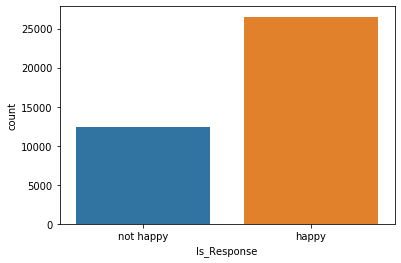

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [22]:
#Let's check the response count

sns.countplot(x='Is_Response',data=data)
plt.show()
data['Is_Response'].value_counts()

We can see that most of the feedbacks/reviews is having Happy response. From 38932 reviews 26521 is happy response.

In [24]:
#We will also check the count of Device_Used and Browser_Used

data['Browser_Used'].value_counts()

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64

In [26]:
data['Device_Used'].value_counts()

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64

As these Device_Used, Browser_Used and User_ID is not giving any value to our prediction so we can get rid of it by droping it from our dataset.

### Data Preprocessing

In [27]:
#Droping unused column from dataset

data.drop(['Device_Used','Browser_Used','User_ID'],axis=1,inplace=True)

In [28]:
data.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


As we have removed unused columns from our dataset, now, we will map our Is_Response columns value to positive and negative. We will map happy to positive and not happy to negative

In [37]:
data['Is_Response'] = data['Is_Response'].map({'happy':'positive','not happy':'negative'})

Let's check the few samples now

In [46]:
data.sample(20)

,Description,Is_Response
19033,Hotel - room comfortable. Room service slow and didn't always get order right. Reception very helpful. Free airport transfer. Biggest problem - it is right next to the train tracks which go past all the time. Worst one in the middle of the night and they have to sound their hooter as the tracks cross the road - so don't expect a quiet stay!\nNot convenient for Downtown Denver! When I booked (t...,negative
32910,"Travel for business all the time & am a long time fan of Hilton properties. However, this one is basically a -nd tier property. Three of us were visiting my son over Thanksgiving & we selected this hotel due to its Hilton affilitation & location. Although it was Thanksgiving & maybe they staffed lighter than usual, check in was very slow, a Hilton Honors check-in line was not available and the...",negative
6457,"To start this Ritz is located right next to the Epicenter Charlotte which is a block of restaurants, bars, clubs, a theater and numerous other entertaining things to do and is great of people watching. It is also about ½ a block from the arena so perfect if you are attending a game. This is the plus but also the minus. Be sure to ask for a room that does not face the Epicenter if you want to r...",positive
30695,"Of all the hotels that were offered in the prace range we requested, we have decided upon Paramount, based mostly on the reviews from this website. And we never regreted the decision. It is really good value for money, service is excellent, staff is friendly and helpful and the location is really to die for - a stone's throw from Times Square. If you like the real buzz of the City that never s...",positive
6691,"I left the Hotel Felix with mixed emotions. \nFirst, the hotel has a great, chic interior. The lobby is nice overall and the lounge areas are fantastic. The hotel staff was always helpful but there were a few things that really irritated me.\nFirst - and this seems silly - but the stupid door signs kept falling off. You think its silly until you have the maid knocking at your door at -am becau...",positive
12687,"The hotel is located at southerr tip of Manhattan, convenient for Battery Park-Financial District sight seeing and easy access to Midtown by subway.the staff at reception created a sincere welcoming impression. Room well equipped, modern-minimalist and spotless",positive
32552,We were booked in a King Executive room. We had a corner room with lots of windows and views of the downtown and a parking garage. The room was comfortable but missing some of the executive ammenities. I had to call - times over - days before I got the coffee maker missing from the room. We were missing the ice bucket and the complimentary robe. The bathroom was cramped and the shower curtain ...,negative
16030,"I stayed at this hotel to attend a conference from July - though July -. This hotel was located near the conference venue, so it was very convinient. And also there was a food market and food court near the hotel.\nHowever, the service is not so good. There is no utensils, for example, no knife, no spoon, and no fork in the room, so I had to borrow these things if necessary. And a housekeeper ...",negative
13746,"Irena at the front desk service does a great job ! She is very helpful, always available and helpful. With her suggestions & advises any problem can be solved. She finds the best solutions to fullfil each request, has always a nice smile sticked on her face compared to some other employees working there too.",negative
886,"Very clean, comfy beds, nice shower, quiet and dark guest room for good sleeping, nice lounge, Starbucks and great pizza joint, and very friendly staff. Also, connected to Circle Centre mall right in the heart of the downtown """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""Wholesale District"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""". Will definitely visit again!",positive


So, we can in our dataset, text is having many special characters, numbers, email address etc. To proceed further we need to remove all special characters, stopwords and numbers from the data. For this we will use Text Cleaning.

### Text Cleaning

In this process, we will clean our text by following methods:

    1) Lower the text
    2) Remove the mail id and website links
    3) Removine numbers from string
    4) Remove the punctuations 
    5) Convert sentence into word tokenize
    6) Remove the stopwords like 'a', 'the','this' etc
    7) Lemmatize the text: transform words into its base form 

In [122]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [143]:
clean_text = []

wnl = WordNetLemmatizer()


def clean_text(text):
    
    #Lower the text
    text = text.lower()
    
    #Removing email id
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #Removing web links
    text = re.sub(r'http\S+', '', text)
    
    #Removing numbers
    text = ''.join([i for i in text if not i.isdigit()])
    
    #Tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    #Removing stopwords
    stopword = stopwords.words('english')
    text = [word for word in text if word not in stopword if(len(word)>3)]
    
    #Lemmatize words
    review_text = ' '.join([wnl.lemmatize(word) for word in text if(len(word)>3)])
    
    #Cleaning text with regular expression
    review_text = re.sub(r"\'s", " 's ", review_text)
    review_text = re.sub(r"\'ve", " 've ", review_text)
    review_text = re.sub(r"n\'t", " 't ", review_text)
    review_text = re.sub(r"\'re", " 're ", review_text)
    review_text = re.sub(r"\'d", " 'd ", review_text)
    review_text = re.sub(r"\'ll", " 'll ", review_text)
    review_text = re.sub(r",", " ", review_text)
    review_text = re.sub(r"\.", " ", review_text)
    review_text = re.sub(r"!", " ", review_text)
    review_text = re.sub(r"\(", " ( ", review_text)
    review_text = re.sub(r"\)", " ) ", review_text)
    review_text = re.sub(r"\?", " ", review_text)
    review_text = re.sub(r"\s{2,}", " ", review_text)
    
    #Removing special characters again 
    review_text = ' '.join([word.strip(string.punctuation) for word in review_text.split(" ")])
    
    
    return review_text
    

We have created a method to clean our text, now, will pass our complete data to the function

In [145]:
data['clean_text'] = data['Description'].apply(lambda x: clean_text(x))

Let's check random smaple

In [146]:
data['Description'][18695]

"It's is very expensive for what it offers,there is absolutely nothing special about this hotel,we stayed in the same month in another hotel in Times Square for a better location,better rooms,better service and of course better rate.nobody even bothers to smile.the room was dusty every day and nothing was special about it,it's just -- min away from times square."

In [147]:
data['clean_text'][18695]

'expensive offers there absolutely nothing special hotel we stayed month another hotel time square better location better rooms better service course better rate nobody even bother smile the room dusty every nothing special it it s away time square'

In [152]:
data.sample(5)

,Description,Is_Response,clean_text
10611,Hotel a great...rooms are clean and hotel has a little trendiness to it. Gives free shuttle rides to various locations..\nFront desk staff very helpful...go t the rock bar restaurant they have...great pizza,positive,hotel great rooms clean hotel little trendiness give free shuttle ride various location front desk staff helpful go rock restaurant have great pizza
16508,"This hotel gave us an enjoyable stay in San Diego. The location is close to Sea World, the room was clean, big, free wireless internet in the room and well equiped. The provided breakfast was good, especially the famous cinnamon roll.They also provide free internet access in the lobby. The staff is helpful. Compare with - star hotel, it only has no bell boys. Good value for anybody visiting Sa...",positive,hotel gave enjoyable stay diego location close world room clean free wireless internet room well equiped provided breakfast good especially famous cinnamon roll they also provide free internet access lobby staff helpful compare star hotel bell boy good value anybody visiting diego s world
16305,"I booked this based on Tripadvisor comments. It's in a handy location if you are fairly fit and don't mind walking. There were myself and my wife plus - teenagers, -- & --. It was about -- mins walk to Fisherman's Wharf and -- mins to downtown. Rooms were clean enough and comfortable but were a bit gloomy. Staff were very friendly and helpful. There is car parking if required and the hotel is ...",negative,booked based tripadvisor comment handy location fairly mind walking wife plus teenager min walk fisherman s wharf min downtown room clean enough comfortable gloomy staff friendly helpful parking required hotel location stray away night problem impress particularly rate good
8061,"My stay in New york City was excellent however my stay at the casablance was very disrespectful. I was insulted by the General Manager on the night of New Years , he rudely told me to get out of his way. He was wasted and had no sense of what was going on. I felt very disrespected when raised his voice at me as if I was a threat. He seemed high and drunk therefore I kept my mouth shut to avoid...",negative,stay york city excellent however stay casablance disrespectful insulted general manager night year rudely told wasted sense going felt disrespected raised voice threat seemed high drunk therefore kept mouth shut avoid getting beat recent trip well morning front desk agent responded dirty attitude committed offensive aganst night stay didnt mind overall hotel location excellent however manageme...
1277,"The facts: non-smoking room REEKED of smoke, as did the lobby. Windows were so dirty that you literally could not see out. Auto-focus camera actually could not focus past the glass. Bathroom full of mold, countless broken tiles, bathtub's entire surface was chipped off and jagged. Electrcal outlet boxes were literally hanging from the walls. I could not even use the restroom. Upon inquiring wh...",negative,fact non-smoking room reeked smoke lobby window dirty literally could auto-focus camera actually could focus past glass bathroom full mold countless broken tile bathtub s entire surface chipped jagged electrcal outlet box literally hanging wall could even restroom upon inquiring whether kind reject room told actually upgraded room left literally minute checking hotel refused refund room night ...


### Exploratory data analysis

Now let's print some wordclouds to have a glimpse at what kind of words apear in our reviews:

In [164]:
# wordcloud function

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 50,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    


Here, we are printing all the positive review words that occured most in our dataset 

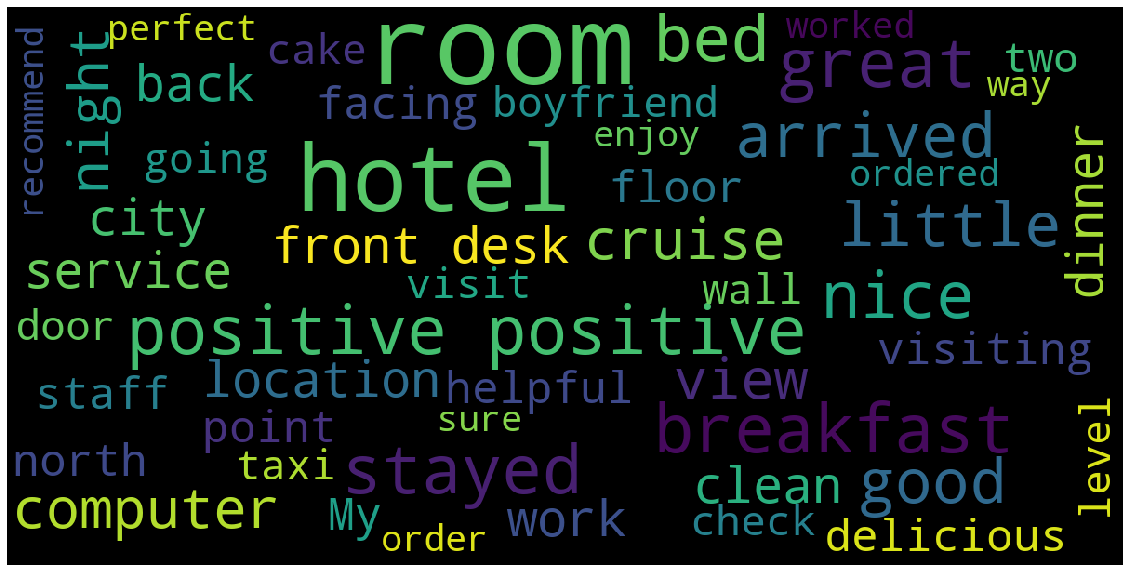

In [168]:
# print wordcloud
show_wordcloud(data[data['Is_Response']=='positive'])

Here, we are printing all the negative review words that occured most in our dataset

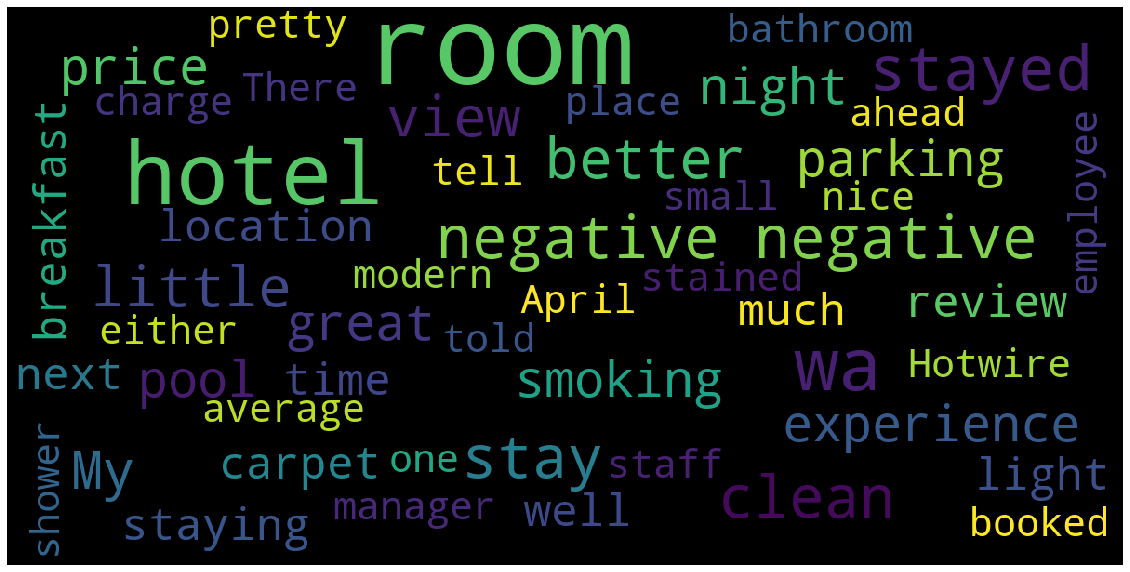

In [167]:
# print wordcloud
show_wordcloud(data[data['Is_Response']=='negative'])

Most of the words are indeed related to the hotels: room, stay, breakfast, etc. Some words are more related to the customer experience with the hotel stay: perfect, loved, expensive, dislike, etc.

### Splitting Train Data

Now, we will split our data into train and test. Here, we are going to set two variables 'reviews' to store clean_text and emotion to hold the Response. 

In [171]:
reviews = data.clean_text
emotion = data.Is_Response

In [172]:
reviews.shape

(38932,)

In [173]:
emotion.shape

(38932,)

As we have stored our data in two variables, now, we will split our entire dataset into four variable train_X, test_X, train_y, test_y and with the test size of 0.2 that is the 20% of data will be in test and 80% of data will be available for training phase and will set our random state to 42.

In [214]:
train_X, test_X, train_y, test_y = train_test_split(reviews, emotion, test_size = 0.2, random_state=42)

Let's print the data to see the how data has distributed

In [215]:
print('train_X :', len(train_X))
print('train_y  :', len(train_y))
print('test_X :', len(test_X))
print('test_y  :', len(test_y))

train_X : 31145
train_y  : 31145
test_X : 7787
test_y  : 7787


### Training

Now, we will train our model by Vectorizing using TF-IDF and with the multiple classifier one by one.

In [221]:
#Defining TD-IDF Vectorizer
tvec = TfidfVectorizer()

#Defining Logistic Regression
lr = LogisticRegression()

### Model Pipeline

We will create a pipeline to set step that will vectorize the data and the it will process through classifier

In [224]:
def test_model(classifier):
    #Creating the pipeline, adding td-idf vectorizer and classifier
    model = Pipeline([('vectorizer',tvec),('classifier',classifier)])
    
    model.fit(train_X, train_y)
    
    return model

#### Logistic Regression

In [226]:
model = test_model(lr)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [227]:
sample_test = ["I stayed there for almost four night, but the room was not clean also there were some smell of dog in the room. Also the food was tasteless"]
sample_test = model.predict(sample_test)

print(sample_test)

sample_test = ["Hotel was superb, room was very clean and the staff service was also good"]
sample_test = model.predict(sample_test)

print(sample_test)

['negative']
['positive']


### Testing

In [228]:
verdict = model.predict(test_X)

confusion_matrix(verdict, test_y)

array([[1888,  315],
       [ 614, 4970]], dtype=int64)

In [229]:
print("Accuracy : ", accuracy_score(verdict, test_y))
print("Precision : ", precision_score(verdict, test_y, average = 'weighted'))
print("Recall : ", recall_score(verdict, test_y, average = 'weighted'))

Accuracy :  0.8806986002311545
Precision :  0.8878328634117718
Recall :  0.8806986002311545


#### Random Forest Classifier

In [230]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
model = test_model(rf)

In [231]:
verdict = model.predict(test_X)

confusion_matrix(verdict, test_y)

array([[1302,  149],
       [1200, 5136]], dtype=int64)

In [232]:
print("Accuracy : ", accuracy_score(verdict, test_y))
print("Precision : ", precision_score(verdict, test_y, average = 'weighted'))
print("Recall : ", recall_score(verdict, test_y, average = 'weighted'))

Accuracy :  0.8267625529729036
Precision :  0.8876904965459659
Recall :  0.8267625529729036


#### Decision Tree Classifier

In [237]:
dtc = DecisionTreeClassifier()
model = test_model(dtc)

In [238]:
verdict = model.predict(test_X)

confusion_matrix(verdict, test_y)

array([[1485,  958],
       [1017, 4327]], dtype=int64)

In [239]:
print("Accuracy : ", accuracy_score(verdict, test_y))
print("Precision : ", precision_score(verdict, test_y, average = 'weighted'))
print("Recall : ", recall_score(verdict, test_y, average = 'weighted'))

Accuracy :  0.746372158726082
Precision :  0.7480784920758128
Recall :  0.746372158726082


#### KNN 

In [242]:
knn = KNeighborsClassifier(n_neighbors=5)
model = test_model(knn)

In [243]:
verdict = model.predict(test_X)

confusion_matrix(verdict, test_y)

array([[1110,  274],
       [1392, 5011]], dtype=int64)

In [244]:
print("Accuracy : ", accuracy_score(verdict, test_y))
print("Precision : ", precision_score(verdict, test_y, average = 'weighted'))
print("Recall : ", recall_score(verdict, test_y, average = 'weighted'))

Accuracy :  0.786053679208938
Precision :  0.8584875126088741
Recall :  0.786053679208938


From the above models we can observe that by using Logistic Regression we are getting highest accuracy score and precision score. So for further use we can opt Logistic Regression as our final model to predict the unknown test data.

#### Saving our Final Model

In [245]:
model = test_model(lr)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [258]:
#Importing test data

test_data = pd.read_csv('D:/DATASCIENCE/Fliprobo/Project_1/test.csv')

#Droping unused columns
test_data.drop(['User_ID','Browser_Used','Device_Used'],inplace=True,axis=1)

In [259]:
test_data.head()

,Description
0,"Looking for a motel in close proximity to TV taping of a Dr. Phil show, we chose the Dunes on Sunset Blvd in West Hollywood. Although the property displayed the AAA emblem, it certainly left a lot to be desired. There were chips & scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full--apparently not replaced by housekeeping. We needed an early wakeup ..."
1,"Walking distance to Madison Square Garden and the Penn Subway Station. Also very close to lots of retail stores and restaurants. The hotel offers free internet, a gym and a hot breakfast. Our room was on the top floor facing --th St. The room was clean and the staff very helpful and accommodating. The downside was that the A-C was making a noise and the faucet in the bathroom was loose - thing..."
2,"Visited Seattle on business. Spent - nights in the Vintage Park. Great location. Room was nice. Bathroom was nice and clean. Thermostat didn't work-had to open the windows to cool the room off. Upon check-in, they asked if I wanted turn-down service. I said yes. Never happened. Asked front desk for a local Seattle restaurant on my first night. She suggested two cookie-cutter wine bars and a ma..."
3,This hotel location is excellent and the rooms are very clean. Our suite was a one bedroom apartment with a full kitchen but a very small bathroom. The staff is friendly and helpful but the rooms do need to be revised. The linens and bedding was hard and outdated. The air conditioner did not work and the heater was on and could not be turned off or adjusted. Althought it was cold outside we fe...
4,This hotel is awesome I love the service Anthony is really a great guy you see at the front desk! It is close to everything and is wonderful for kids I love it. The best hotel ever but wonderful cleanliness and quality great hotel for couples and singles.


In [260]:
reviews = test_data.Description

In [261]:
predicted = model.predict(reviews)

Now, let's merge the predicted result with the test data

In [262]:
test_data['response'] = predicted

In [263]:
test_data.head()

,Description,response
0,"Looking for a motel in close proximity to TV taping of a Dr. Phil show, we chose the Dunes on Sunset Blvd in West Hollywood. Although the property displayed the AAA emblem, it certainly left a lot to be desired. There were chips & scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full--apparently not replaced by housekeeping. We needed an early wakeup ...",negative
1,"Walking distance to Madison Square Garden and the Penn Subway Station. Also very close to lots of retail stores and restaurants. The hotel offers free internet, a gym and a hot breakfast. Our room was on the top floor facing --th St. The room was clean and the staff very helpful and accommodating. The downside was that the A-C was making a noise and the faucet in the bathroom was loose - thing...",positive
2,"Visited Seattle on business. Spent - nights in the Vintage Park. Great location. Room was nice. Bathroom was nice and clean. Thermostat didn't work-had to open the windows to cool the room off. Upon check-in, they asked if I wanted turn-down service. I said yes. Never happened. Asked front desk for a local Seattle restaurant on my first night. She suggested two cookie-cutter wine bars and a ma...",negative
3,This hotel location is excellent and the rooms are very clean. Our suite was a one bedroom apartment with a full kitchen but a very small bathroom. The staff is friendly and helpful but the rooms do need to be revised. The linens and bedding was hard and outdated. The air conditioner did not work and the heater was on and could not be turned off or adjusted. Althought it was cold outside we fe...,negative
4,This hotel is awesome I love the service Anthony is really a great guy you see at the front desk! It is close to everything and is wonderful for kids I love it. The best hotel ever but wonderful cleanliness and quality great hotel for couples and singles.,positive


Lets check random sample

In [265]:
test_data.shape

(29404, 2)

In [264]:
test_data.iloc[121]

Description    This is my second time at the Beacon and my experience was fantastic. I feel like I am coming home every time I walked through the doors. I would like to thank all the staff for meeting our every need. I love New York, I have never been treated with so much kindness and genuine sincerity as I have in America. Please give my regards to Ryan who always went beyond his duties, he is a real asset ...
response                                                                                                                                                                                                                                                                                                                                                                                                              positive
Name: 121, dtype: object

As we have picked random feedback of user which looks like a positive feedback, and our predicted result is also showing positive.

In [266]:
test_data.iloc[8426]

Description    The staff at the Carlton is great. The brochure says they love SF and based on talking with the personnel at the front desk, they are right. From Theo's knowledge about """"""""""""""""""""""""""""""""Fina Estampa"""""""""""""""""""""""""""""""" for great Peruvian cuisine to Margaret's quick set up of a wine country tour, we felt we were well taken care of. SF is great and the crew at the fron...
response                                                                                                                                                                                                                                                                                                                                                                                                              positive
Name: 8426, dtype: object

It is also giving correct prediction.

In [267]:
test_data.iloc[5445]

Description    My son and I stayed for several days as I was in-town for a business matter. Wonderful historic hotel with class and especially great if you are into western decor. Walking distance to good dining and entertainment. Really nice rooms with great comfort. Just an all around nice experience.\nMy son loved as much as I did!
response                                                                                                                                                                                                                                                                                                                                positive
Name: 5445, dtype: object

Saving predicted result into csv.

In [268]:
test_data.to_csv(r'Hotel-Reviews-Prediction.csv', index = False)

### CONCLUSION

In this project, I've used Hotel Review dataset to predict sentiment based on the customer given feedback. To predict sentiments we have used various techniques, started with data preprocessin, text cleaning, data analysis and the building a model. While building a model we've used various classifier to predict the data, among all model Logistic Regression has performed well and gave the highest accuracy score.